In [2]:
%pylab inline
import numpy as np
import scipy.optimize 
import pandas as pd
global g  
g=9.8

Populating the interactive namespace from numpy and matplotlib


In [3]:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    t=float(tend)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    t=float(t)
    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=scipy.optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size
    return x,xmax,Smin,Dt  

In [4]:
#cambiando la posición final a x=8
t=3.
m=0.2
y=xfit(21,t,m,xend=8.)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -42.941644
         Iterations: 27
         Function evaluations: 5432


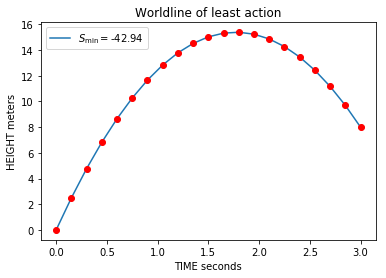

In [5]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')

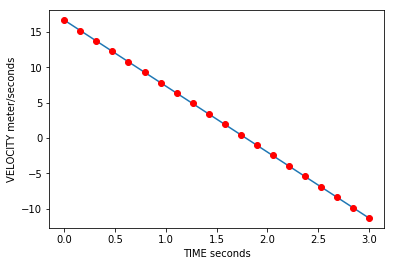

In [6]:
v=(x[1:]-x[:-1])/Dt
Dt=t/v[:-1].size
tx=np.arange(0,t+Dt,Dt)
plt.plot(tx,v)
plt.plot(tx,v,'ro')
plt.xlabel('TIME seconds')
plt.ylabel('VELOCITY meter/seconds')

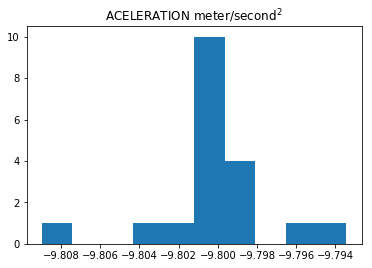

In [7]:
Dt=t/x[:-1].size
a=(v[1:]-v[:-1])/Dt
pa=plt.hist(a)
plt.title('ACELERATION meter/second$^2$')

In [8]:
T=0.5*m*v**2
V=0.5*m*g*(x[1:]+x[:-1])
E=T+V
print (np.round(E,2))

[ 30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11
  30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11  30.11]


In [9]:
SS=(T-V)*Dt
SS

array([ 3.78247022,  2.38032755,  1.10800182, -0.03477804, -1.04799606,
       -1.93145625, -2.68529673, -3.30944048, -3.80390529, -4.16876165,
       -4.40395737, -4.50952491, -4.48541436, -4.33163342, -4.04827894,
       -3.63525411, -3.09226054, -2.4200705 , -1.61804763, -0.68636747])

In [10]:
print ('S_MINIMUM=%g  Joules*second' %SS.sum())

S_MINIMUM=-42.9416  Joules*second
